## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})\
.rename({'rating_count_tot': 'rating_count_total', 'user_rating': 'rating', 'track_name': 'app'}, axis=1)


In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay



for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

#google_play_store['Category'].replace('Music & Video', 'Music', inplace = True)
#google_play_store['Category'].replace(' ', 'Music', inplace = True) #saffssdafsdsfsdfsdfdsfdsfsdfsdfsfsd

google_play_store['Category'].replace('GAME', 'Games', inplace = True)
google_play_store['Category'].replace('PRODUCTIVITY', 'Productivity', inplace = True)
google_play_store['Category'].replace('WEATHER', 'Weather', inplace = True)
google_play_store['Category'].replace('SHOPPING', 'Shopping', inplace = True)
google_play_store['Category'].replace('FINANCE', 'Finance', inplace = True)
google_play_store['Category'].replace('TOOLS', 'Utilities', inplace = True)
google_play_store['Category'].replace('PERSONALIZATION', 'Utilities', inplace = True)
google_play_store['Category'].replace('TRAVEL_AND_LOCAL', 'Travel', inplace = True)
google_play_store['Category'].replace('SOCIAL', 'Social Networking', inplace = True)
google_play_store['Category'].replace('DATING', 'Social Networking', inplace = True)
google_play_store['Category'].replace('COMMUNICATION', 'Social Networking', inplace = True)
google_play_store['Category'].replace('SPORTS', 'Sports', inplace = True)
google_play_store['Category'].replace('BUSINESS', 'Business', inplace = True)
google_play_store['Category'].replace('HEALTH_AND_FITNESS', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('BEAUTY', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('ENTERTAINMENT', 'Entertainment', inplace = True)
google_play_store['Category'].replace('COMICS', 'Entertainment', inplace = True)
google_play_store['Category'].replace('VIDEO_PLAYERS', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('PHOTOGRAPHY', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('ART_AND_DESIGN', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('MAPS_AND_NAVIGATION', 'Navigation', inplace = True)
google_play_store['Category'].replace('EDUCATION', 'Education', inplace = True)
google_play_store['Category'].replace('PARENTING', 'Education', inplace = True)
google_play_store['Category'].replace('LIFESTYLE', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('EVENTS', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('HOUSE_AND_HOME', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('AUTO_AND_VEHICLES', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FAMILY', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FOOD_AND_DRINK', 'Food & Drink', inplace = True)
google_play_store['Category'].replace('NEWS_AND_MAGAZINES', 'News', inplace = True)
google_play_store['Category'].replace('MEDICAL', 'Medical', inplace = True)
google_play_store['Category'].replace('LIBRARIES_AND_DEMO', 'Catalogs', inplace = True)


apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
google_play_store['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)


In [5]:
google_play_store["rating"] = google_play_store["rating"].fillna(google_play_store["rating"].median())
#replacing all NaN values with median of column 'rating'

In [6]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [7]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 80]

In [8]:
#apple_store[apple_store['price'] > 60 ] # uncomment and run to see all expensive apps

In [9]:
apple_store = apple_store[apple_store['price'] <= 80]

In [10]:
# top rated apps for google where amount of reviews is more than 300
google_play_top = google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


In [11]:
# top rated apps for google where amount of reviews is more than 300
apple_top = apple_store[(apple_store["rating_count_total"] > 300) & (apple_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


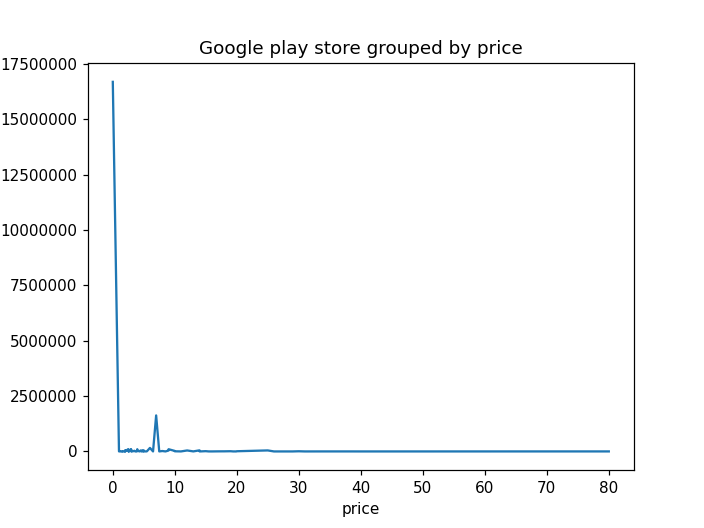

In [18]:
%matplotlib notebook

paid_apps_google = google_play_store[(google_play_store['price'] != 0.0)].fillna(0)
df1 = paid_apps_google.groupby("price").mean()

df2 = google_play_store[google_play_store['rating'].notna()].groupby("price").mean()
plt.title("Google play store grouped by price")
plt.ylabel('rating count')
plt.xlabel('price')

plt.ticklabel_format(style='plain')
plt.plot(df2.index, df2['installs'])

<IPython.core.display.Javascript object>


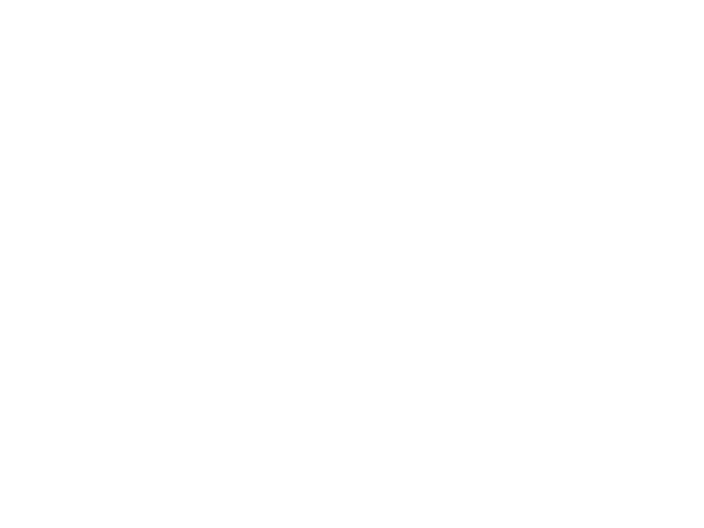

In [13]:
%matplotlib notebook

paid_apps_apple = apple_store[(apple_store['price'] != 0.0) & apple_store['rating'] > 0.0] 
df3 = paid_apps_apple.groupby("price").mean()


df4 = apple_store.groupby("price").mean()
plt.title("Apple Store grouped by price")
plt.xlabel('price')
plt.ylabel('rating count')

plt.ticklabel_format(style='plain')
plt.plot(df4.index, df4['rating_count_total'])

<IPython.core.display.Javascript object>


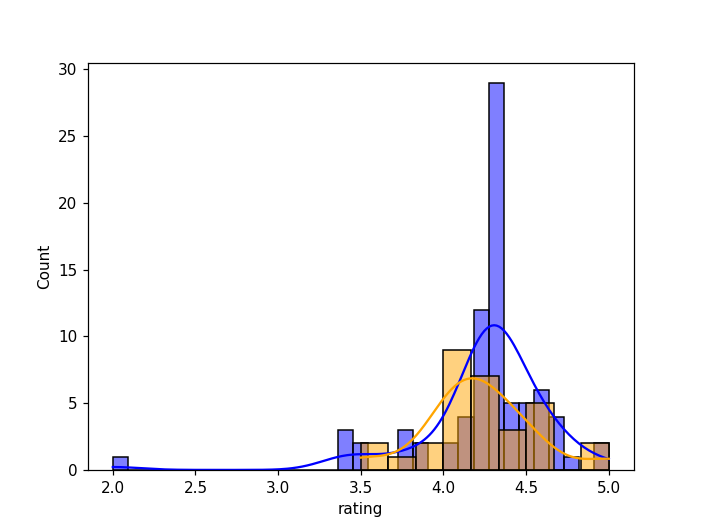

<AxesSubplot:xlabel='rating', ylabel='Count'>

In [14]:
%matplotlib notebook

plt.ticklabel_format(style='plain')
sns.histplot(df1['rating'], kde=True, color='blue')
sns.histplot(df3['rating'], kde=True, color='orange')

In [15]:
apple_store[apple_store['rating']>5]

,app,size_bytes,currency,price,rating_count_total,rating_count_ver,rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


<IPython.core.display.Javascript object>


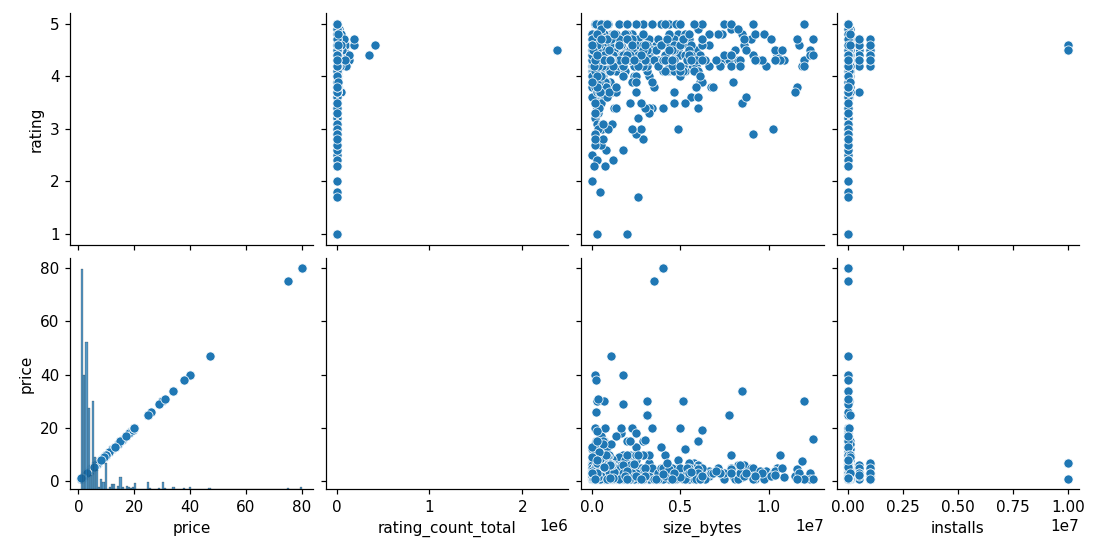

In [16]:
# some apps occure in table multiple times
google_play_store[google_play_store['app'] == 'Minecraft']
sns.pairplot(
    paid_apps_google,
    x_vars=['price', 'rating_count_total','size_bytes', 'installs'], # with 'price' it isn't working ¯\_(ツ)_/¯
    # and if change 'price' with for example  'rating_count_total' it'll give exception that price is not in index
    # also first chart isn't showing and i don't know why(if we just remove 'price')
    y_vars=["rating", 'price'],
)